### Data Modeling using Statistic Vectorization Model of the Data

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nlp import preprocessing as pp

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Load the vocabulary dictionaries for building word stats

In [16]:
vocab_dict = pp.get_cefr_word_dictionary()
adv_vocab_dict = pp.get_cefr_word_dictionary_adv()

#### Load the main data frame containing the readings and asscoiated levels



In [17]:
# One-stop
# data = pd.read_csv('data/one_stop.csv')

# CEFR
cefr_data = pd.read_csv('data/added.csv')

#### Adding average word per document to dataframe

In [18]:
# One-Stop
# avg_word = pp.get_avg_word_length(data, 'documents')
# data['avg_word_len'] = avg_word

# CEFR
#nltk.download('punkt')
cefr_avg_word = pp.get_avg_word_length(cefr_data, 'documents')
cefr_data['avg_word_len'] = cefr_avg_word

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Load Word levels Data Frame. Using previously loaded vocabulary dictionies

In [19]:
# One-Stop
# levels_df = pp.get_word_level_dataframe(data, 'documents', vocab_dict, adv_vocab_dict)

# CEFR
cefr_levels_df = pp.get_word_level_dataframe(cefr_data, 'documents', vocab_dict, adv_vocab_dict)

#### Chart

<Axes: title={'center': 'Word Level Distribution for the First Ten Documents'}>

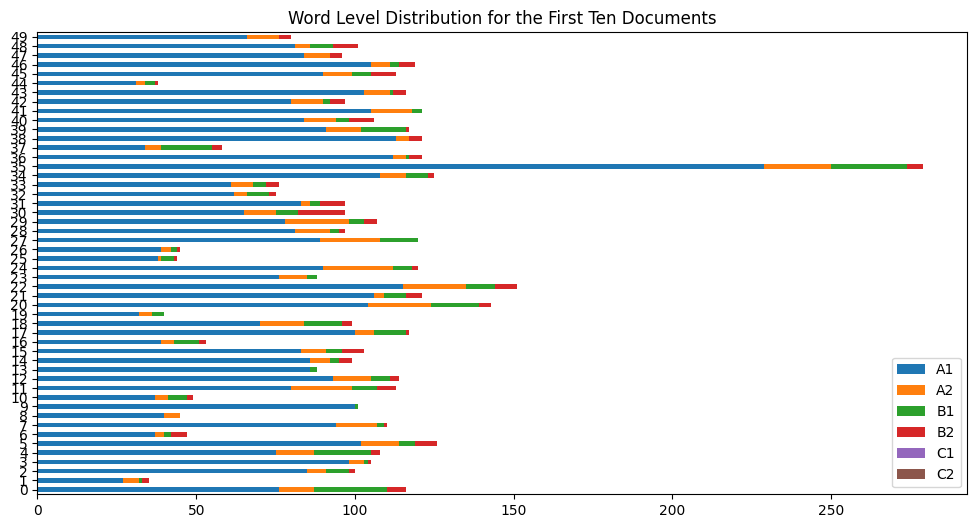

In [20]:
cefr_levels_df[:50].plot.barh(stacked=True, figsize=(12, 6), title='Word Level Distribution for the First Ten Documents')

#### Load Parts of Speech Dataframe. Drop entries with fewer than 2000 and 100 entries in the columns to avoid noise

In [21]:
# One-Stop
# pos_df = pp.get_part_of_speech_dataframe(data, 'documents')

# drop_pos = []
# for row in pd.DataFrame(pos_df.sum()).iterrows():
#     if row[1][0] < 2000:
#         drop_pos.append(row[0])
# drop_pos

# pos_df.drop(drop_pos, axis=1, inplace=True)

# CEFR
#nltk.download('averaged_perceptron_tagger')
cefr_pos_df = pp.get_part_of_speech_dataframe(cefr_data, 'documents')

drop_pos = []
for row in pd.DataFrame(cefr_pos_df.sum()).iterrows():
    if row[1][0] < 100:
        drop_pos.append(row[0])
drop_pos

cefr_pos_df.drop(drop_pos, axis=1, inplace=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ravis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<Axes: title={'center': 'Word Level Distribution for the First Ten Documents'}>

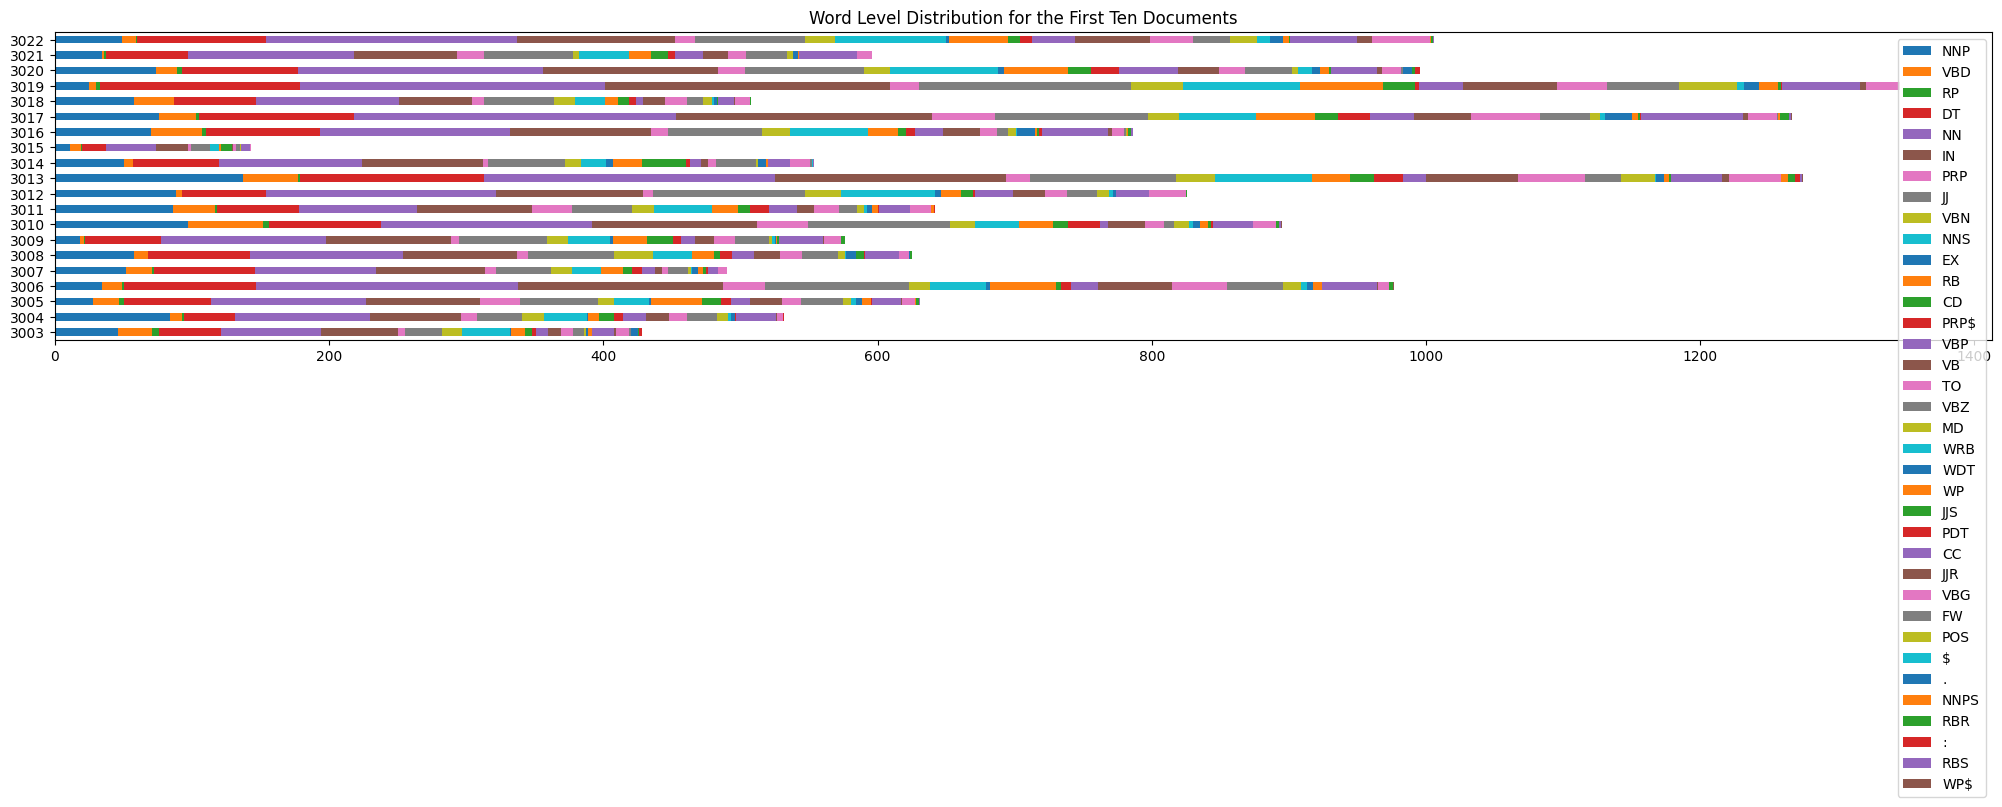

In [22]:
cefr_pos_df[-28:-8].plot.barh(stacked=True, figsize=(25, 4), title='Word Level Distribution for the First Ten Documents')

In [23]:
# # Exploration of parts-of-speech distributions
# total = sum(counts)
# for c in counts:
#     print(c, c/total)
# sum(pd.DataFrame(pos_df.sum()).values[:, 0].tolist())

#### Loading the Full Data Frame for analysis

In [24]:
# One-Stop
# df = pp.get_full_dataframe(data, 'documents', 'level', levels_df, pos_df)

# CEFR
cefr_df = pp.get_full_dataframe(cefr_data, 'documents', 'cefr_level', cefr_levels_df, cefr_pos_df)

c:\Users\ravis\Desktop\PersonifiedScriptWriter\phase-1-cerf\nlp\preprocessing.py:126: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_words = df_1.groupby('doc_id').sum()


In [25]:
cefr_df

,documents,cefr_level,avg_word_len,num_of_words,A1,A2,B1,B2,C1,C2,...,VBG,FW,POS,$,.,NNPS,RBR,:,RBS,WP$
0,Sandra picked up the bag of peanuts. It was a ...,A1,4.23,121,76,11,23,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Mommy. I don't feel good.\nWhat's wrong, Josep...",A1,4.57,35,27,5,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Herman didn't like his first name. He had neve...,A1,4.13,106,85,6,7,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dora wanted to buy a card for her mother. Her ...,A1,3.96,105,98,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sally had a cold. Her nose was red. She pulled...,A1,4.05,112,75,12,18,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,"The classic Sorites, or ‘heap argument’, seeks...",C2,5.03,437,252,53,44,31,0,2,...,5,0,0,1,0,1,0,0,0,0
3027,In 1932 Marcuse published one of the first rev...,C2,5.41,861,472,84,97,70,6,0,...,11,0,0,0,0,0,2,0,0,0
3028,Federal officials said Thursday more needs to ...,C2,5.44,392,193,44,69,48,0,0,...,10,0,0,0,0,0,0,5,0,0
3029,The number of Americans filing new application...,C2,5.32,819,422,93,96,71,2,0,...,17,0,0,0,0,3,1,0,0,0


In [27]:

cefr_df.to_csv('data/cefr_df.csv')



In [28]:
cefr_df.dtypes

documents        object
cefr_level       object
avg_word_len    float64
num_of_words      int64
A1                int64
A2                int64
B1                int64
B2                int64
C1                int64
C2                int64
NNP               int64
VBD               int64
RP                int64
DT                int64
NN                int64
IN                int64
PRP               int64
JJ                int64
VBN               int64
NNS               int64
EX                int64
RB                int64
CD                int64
PRP$              int64
VBP               int64
VB                int64
TO                int64
VBZ               int64
MD                int64
WRB               int64
WDT               int64
WP                int64
JJS               int64
PDT               int64
CC                int64
JJR               int64
VBG               int64
FW                int64
POS               int64
$                 int64
.                 int64
NNPS            

In [29]:
# features = ['num_of_words', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']
cefr_drop = ['documents','cefr_level']
# one_stop_drop = ['documents', 'doc_list', 'avg_num_words', 'total_num_sents', 'total_num_words', 'words_per_sents', 'level']

# documents = df.drop(one_stop_drop, axis=1)
cefr_documents = cefr_df.drop(cefr_drop, axis=1)

# target = df['level']
cefr_target = cefr_df['cefr_level']


##previous experiment with the One-Stop-English-Corpus
# three_levels = []
# for level in cefr_df['cefr_level']:
#     if level == 0:
#         three_levels.append('Ele')

#     elif ((level == 1) or (level == 2)):
#         three_levels.append('Int')

#     else:
#         three_levels.append('Adv')


# cefr_target = three_levels


# X_train = documents
# y_train = target

# X_test = cefr_documents
# y_test = cefr_target

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=0.2, random_state=29)
X_train, X_test, y_train, y_test = train_test_split(cefr_documents, cefr_target, test_size=0.3, random_state=29,stratify=cefr_target,shuffle=True)

#### Book texts for Testing

In [30]:
# Amazon text
Amazon = "Tyler, trying to win back her attention, asked Lauren's opinion on a CD he held. She was distracted. I stared at the \
deep-voiced boy, taken aback, but he was looking away toward the dark forest behind us. He'd said that the Cullens didn't come here, \
but his tone had implied something more—that they weren't allowed; they were prohibited. His manner left a strange impression on me, \
and I tried toignore it without success."

In [31]:
# Great Gatsby text
gg = "He smiled understandingly-much more than understandingly. It was one of those rare smiles with a quality of eternal reassurance \
in it, that you may come across four or five times in life. It faced--or seemed to face--the whole eternal world for an instant, and \
then concentrated on you with an irresistible prejudice in your favor. It understood you just as far as you wanted to be understood, \
believed in you as you would like to believe in yourself, and assured you that it had precisely the impression of you that, at your \
best, you hoped to convey"

In [32]:
# Charlie and the Chocolate Factory text
cc = "Mr Willy Wonka can make marshmallows that taste of violets, and rich caramels that change colour every ten seconds as you suck \
them, and little feathery sweets that melt away deliciously the moment you put them between your lips. He can make chewing-gum that \
never loses its taste, and sugar balloons that you can blow up to enormous sizes before you pop them with a pin and gobble them up. \
And, by a most secret method, he can make lovely blue birds' eggs with black spots on them, and when you put one of these in your \
mouth, it gradually gets smaller and smaller until suddenly there is nothing left except a tiny little DARKRED sugary baby bird \
sitting on the tip of your tongue."

#### Model: Multinomial Naive Bayes

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

# Define pipeline
pipe_nb = make_pipeline(MultinomialNB())

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipe_nb, X_train, y_train, cv=kfold)

# Train the model
pipe_nb.fit(X_train, y_train)

# Evaluate the model
train_acc = pipe_nb.score(X_train, y_train)
test_acc = pipe_nb.score(X_test, y_test)
y_pred = pipe_nb.predict(X_test)
report = classification_report(y_test, y_pred)

# Print results
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", test_acc)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(report)


Training Accuracy: 0.52993870815653
Validation Accuracy: 0.4868131868131868
Cross-validation Scores: [0.52112676 0.52358491 0.51886792 0.51415094 0.47169811 0.53301887
 0.52358491 0.50943396 0.50943396 0.55188679]
Mean Cross-validation Score: 0.5176787137921871

Classification Report:
              precision    recall  f1-score   support

          A1       0.50      0.72      0.59        86
          A2       0.63      0.55      0.59       183
          B1       0.34      0.31      0.32       141
          B2       0.51      0.47      0.49       193
          C1       0.39      0.33      0.36       165
          C2       0.51      0.64      0.57       142

    accuracy                           0.49       910
   macro avg       0.48      0.50      0.49       910
weighted avg       0.49      0.49      0.48       910



In [35]:
test_pred = pipe_nb.predict(X_test)

In [36]:
list_of_keys = cefr_pos_df.columns.tolist()
Amazon_sample = pp.process_sample(Amazon, list_of_keys, vocab_dict, adv_vocab_dict)
gatsby_sample = pp.process_sample(gg, list_of_keys, vocab_dict, adv_vocab_dict)
charlie_sample = pp.process_sample(cc, list_of_keys, vocab_dict, adv_vocab_dict)

In [37]:
print(f'Amazon predicted level: {pipe_nb.predict([Amazon_sample])}')
print(f'Gatsby predicted level: {pipe_nb.predict([gatsby_sample])}')
print(f'Charlie predicted level: {pipe_nb.predict([charlie_sample])}')

Amazon predicted level: ['A2']
Gatsby predicted level: ['A2']
Charlie predicted level: ['B1']


c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Confusion Matrix


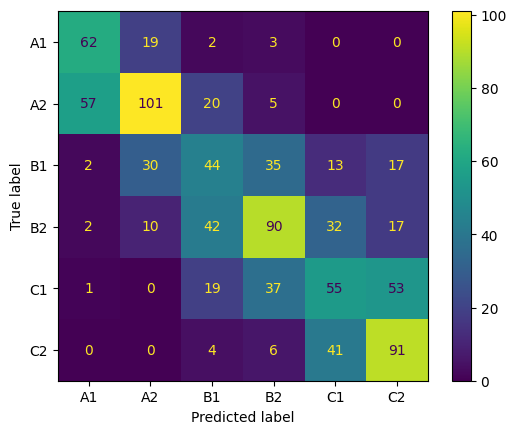

In [38]:
print('Confusion Matrix')
import sklearn


cm = sklearn.metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=pipe_nb.classes_)
disp.plot()

Confusion Matrix


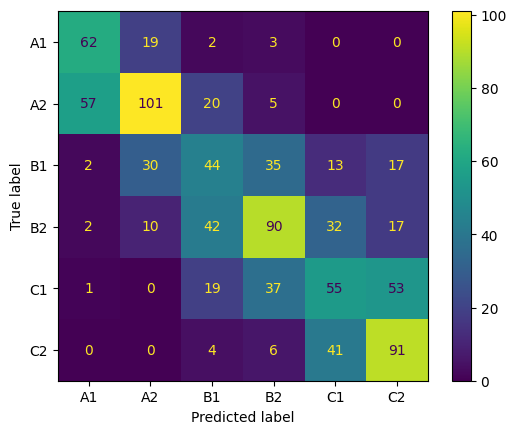

In [39]:
print('Confusion Matrix')
# plot_confusion_matrix(clf, X_test, y_test)


cm = sklearn.metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipe_nb.classes_)
disp.plot()
# plt.show()

#### Model: Gradient Boosting Classifer--overfit

In [40]:
from sklearn.ensemble import GradientBoostingClassifier


# Define pipeline
pipe_gbc = make_pipeline(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))

# Train the model
pipe_gbc.fit(X_train, y_train)

# Define cross-validation strategy
kfold_gbc = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_gbc = cross_val_score(pipe_gbc, X_train, y_train, cv=kfold_gbc)

# Evaluate the model
train_acc_gbc = pipe_gbc.score(X_train, y_train)
test_acc_gbc = pipe_gbc.score(X_test, y_test)
y_pred_gbc = pipe_gbc.predict(X_test)
report_gbc = classification_report(y_test, y_pred_gbc)

# Print results
print("Training Accuracy:", train_acc_gbc)
print("Validation Accuracy:", test_acc_gbc)
print("Cross-validation Scores:", cv_scores_gbc)
print("Mean Cross-validation Score:", cv_scores_gbc.mean())
print("\nClassification Report:")
print(report_gbc)


Training Accuracy: 0.8378123526638378
Validation Accuracy: 0.6648351648351648
Cross-validation Scores: [0.70352941 0.71462264 0.67688679 0.71933962 0.67216981]
Mean Cross-validation Score: 0.6973096559378469

Classification Report:
              precision    recall  f1-score   support

          A1       0.71      0.65      0.68        86
          A2       0.72      0.82      0.77       183
          B1       0.65      0.52      0.58       141
          B2       0.60      0.72      0.65       193
          C1       0.55      0.48      0.51       165
          C2       0.78      0.76      0.77       142

    accuracy                           0.66       910
   macro avg       0.67      0.66      0.66       910
weighted avg       0.66      0.66      0.66       910



#### Model: Logistic Regression: One vs Rest --overfit

In [42]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


# Define classifier
clf = OneVsRestClassifier(LogisticRegression(max_iter=10000)).fit(X_train, y_train)

# Define cross-validation strategy
kfold_lror = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_lror = cross_val_score(clf, X_train, y_train, cv=kfold_lror)

# Evaluate the model
train_acc_lror = clf.score(X_train, y_train)
test_acc_lror = clf.score(X_test, y_test)
y_pred_lror = clf.predict(X_test)
report_lror = classification_report(y_test, y_pred_lror)

# Print results
print("Training Accuracy:", train_acc_lror)
print("Validation Accuracy:", test_acc_lror)
print("Cross-validation Scores:", cv_scores_lror)
print("Mean Cross-validation Score:", cv_scores_lror.mean())
print("\nClassification Report:")
print(report_lror)


Training Accuracy: 0.6496935407826497
Validation Accuracy: 0.5747252747252747
Cross-validation Scores: [0.58117647 0.56839623 0.55896226 0.5990566  0.625     ]
Mean Cross-validation Score: 0.5865183129855717

Classification Report:
              precision    recall  f1-score   support

          A1       0.61      0.67      0.64        86
          A2       0.66      0.73      0.69       183
          B1       0.52      0.38      0.44       141
          B2       0.46      0.60      0.52       193
          C1       0.50      0.36      0.42       165
          C2       0.72      0.72      0.72       142

    accuracy                           0.57       910
   macro avg       0.58      0.58      0.57       910
weighted avg       0.57      0.57      0.57       910



In [43]:
clf.predict(X_test)

array(['B2', 'C1', 'C2', 'C2', 'A2', 'B1', 'B2', 'A2', 'A2', 'C1', 'C2',
       'C1', 'B2', 'C2', 'A2', 'B2', 'A1', 'C2', 'C2', 'C1', 'B1', 'B2',
       'B1', 'A1', 'C1', 'B1', 'B1', 'A1', 'C1', 'A1', 'B1', 'C2', 'A2',
       'B1', 'A1', 'B2', 'B2', 'A2', 'A1', 'B2', 'A2', 'C1', 'C2', 'B1',
       'A2', 'B2', 'C2', 'B1', 'A2', 'B2', 'B2', 'B2', 'B2', 'B1', 'A2',
       'C1', 'A2', 'A1', 'A1', 'B2', 'B2', 'A2', 'A2', 'C2', 'C1', 'C1',
       'A2', 'C2', 'B2', 'B2', 'A2', 'C1', 'A2', 'C1', 'C1', 'B2', 'C1',
       'A1', 'C1', 'A2', 'A2', 'B2', 'C1', 'A1', 'A2', 'A2', 'C2', 'B2',
       'B1', 'A2', 'A2', 'C1', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2',
       'A2', 'A2', 'B1', 'A1', 'C1', 'A1', 'B2', 'B2', 'B2', 'B2', 'C2',
       'A2', 'B2', 'C2', 'A2', 'B2', 'A2', 'A2', 'A2', 'C2', 'B2', 'C1',
       'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'C2', 'B2', 'B1', 'B2', 'C2',
       'B1', 'B1', 'A2', 'C2', 'B2', 'A1', 'B2', 'B2', 'B1', 'B1', 'C2',
       'A2', 'A2', 'B2', 'B1', 'B1', 'B1', 'B2', 'C

In [44]:
print(f'Amazon predicted level: {clf.predict([Amazon_sample])}')
print(f'Gatsby predicted level: {clf.predict([gatsby_sample])}')
print(f'Charlie predicted level: {clf.predict([charlie_sample])}')

Amazon predicted level: ['A2']
Gatsby predicted level: ['A2']
Charlie predicted level: ['A2']


c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion Matrix


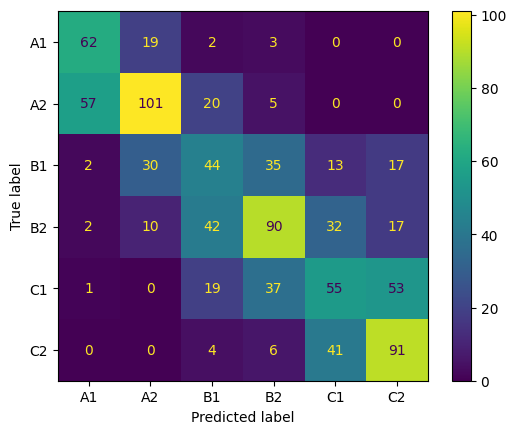

In [45]:
print('Confusion Matrix')
# plot_confusion_matrix(clf, X_test, y_test)


cm = sklearn.metrics.confusion_matrix(y_test, test_pred, labels=clf.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
# plt.show()

### xgboost clf--overfit

In [46]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define pipeline
pipe_xgb = make_pipeline(XGBClassifier())

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipe_xgb, X_train, y_train_encoded, cv=kfold)

# Train the model
pipe_xgb.fit(X_train, y_train_encoded)

# Evaluate the model
train_acc_xgb = accuracy_score(y_train_encoded, pipe_xgb.predict(X_train))
test_acc_xgb = accuracy_score(y_test_encoded, pipe_xgb.predict(X_test))
y_pred_xgb = pipe_xgb.predict(X_test)
report_xgb = classification_report(y_test_encoded, y_pred_xgb)

# Print results
print("Training Accuracy:", train_acc_xgb)
print("Validation Accuracy:", test_acc_xgb)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(report_xgb)


Training Accuracy: 0.9995285242809995
Validation Accuracy: 0.8208791208791208
Cross-validation Scores: [0.78823529 0.8490566  0.80188679 0.7995283  0.81132075]
Mean Cross-validation Score: 0.810005549389567

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        86
           1       0.82      0.90      0.86       183
           2       0.82      0.77      0.79       141
           3       0.82      0.85      0.83       193
           4       0.76      0.75      0.75       165
           5       0.88      0.87      0.87       142

    accuracy                           0.82       910
   macro avg       0.82      0.81      0.82       910
weighted avg       0.82      0.82      0.82       910



### knn clf

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define pipeline
pipe_knn = make_pipeline(KNeighborsClassifier())

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipe_knn, X_train, y_train_encoded, cv=kfold)

# Train the model
pipe_knn.fit(X_train, y_train_encoded)

# Evaluate the model
train_acc_knn = accuracy_score(y_train_encoded, pipe_knn.predict(X_train))
test_acc_knn = accuracy_score(y_test_encoded, pipe_knn.predict(X_test))
y_pred_knn = pipe_knn.predict(X_test)
report_knn = classification_report(y_test_encoded, y_pred_knn)

# Print results
print("Training Accuracy:", train_acc_knn)
print("Validation Accuracy:", test_acc_knn)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(report_knn)


Training Accuracy: 0.7336162187647336
Validation Accuracy: 0.5824175824175825
Cross-validation Scores: [0.58823529 0.61556604 0.54716981 0.58490566 0.58018868]
Mean Cross-validation Score: 0.5832130965593786

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        86
           1       0.72      0.84      0.77       183
           2       0.50      0.41      0.45       141
           3       0.47      0.61      0.53       193
           4       0.49      0.44      0.46       165
           5       0.64      0.47      0.54       142

    accuracy                           0.58       910
   macro avg       0.60      0.58      0.59       910
weighted avg       0.58      0.58      0.58       910



### ada-boost clf

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define pipeline
pipe_adaboost = make_pipeline(AdaBoostClassifier())

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipe_adaboost, X_train, y_train_encoded, cv=kfold)

# Train the model
pipe_adaboost.fit(X_train, y_train_encoded)

# Evaluate the model
train_acc_adaboost = accuracy_score(y_train_encoded, pipe_adaboost.predict(X_train))
test_acc_adaboost = accuracy_score(y_test_encoded, pipe_adaboost.predict(X_test))
y_pred_adaboost = pipe_adaboost.predict(X_test)
report_adaboost = classification_report(y_test_encoded, y_pred_adaboost)

# Print results
print("Training Accuracy:", train_acc_adaboost)
print("Validation Accuracy:", test_acc_adaboost)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(report_adaboost)


Training Accuracy: 0.39745403111739747
Validation Accuracy: 0.4065934065934066
Cross-validation Scores: [0.36235294 0.38207547 0.33254717 0.43867925 0.36084906]
Mean Cross-validation Score: 0.37530077691453945

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.98      0.70        86
           1       0.70      0.51      0.59       183
           2       0.40      0.14      0.21       141
           3       0.29      0.12      0.17       193
           4       0.30      0.90      0.45       165
           5       0.00      0.00      0.00       142

    accuracy                           0.41       910
   macro avg       0.37      0.44      0.35       910
weighted avg       0.37      0.41      0.34       910



c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### random forest clf--overfit

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

pipe_rf = make_pipeline(RandomForestClassifier())
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe_rf, X_train, y_train_encoded, cv=kfold)
pipe_rf.fit(X_train, y_train_encoded)

train_acc_rf = accuracy_score(y_train_encoded, pipe_rf.predict(X_train))
test_acc_rf = accuracy_score(y_test_encoded, pipe_rf.predict(X_test))
y_pred_rf = pipe_rf.predict(X_test)
report_rf = classification_report(y_test_encoded, y_pred_rf)

print("Training Accuracy:", train_acc_rf)
print("Validation Accuracy:", test_acc_rf)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(report_rf)


Training Accuracy: 0.9995285242809995
Validation Accuracy: 0.8175824175824176
Cross-validation Scores: [0.79764706 0.83018868 0.79009434 0.7995283  0.79245283]
Mean Cross-validation Score: 0.8019822419533851

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        86
           1       0.80      0.91      0.85       183
           2       0.87      0.73      0.79       141
           3       0.77      0.87      0.82       193
           4       0.80      0.72      0.75       165
           5       0.90      0.87      0.88       142

    accuracy                           0.82       910
   macro avg       0.83      0.81      0.81       910
weighted avg       0.82      0.82      0.82       910



### descision-tree clf-overfit

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define pipeline
pipe_decision_tree = make_pipeline(DecisionTreeClassifier())

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipe_decision_tree, X_train, y_train_encoded, cv=kfold)

# Train the model
pipe_decision_tree.fit(X_train, y_train_encoded)

# Evaluate the model
train_acc_decision_tree = accuracy_score(y_train_encoded, pipe_decision_tree.predict(X_train))
test_acc_decision_tree = accuracy_score(y_test_encoded, pipe_decision_tree.predict(X_test))
y_pred_decision_tree = pipe_decision_tree.predict(X_test)
report_decision_tree = classification_report(y_test_encoded, y_pred_decision_tree)

# Print results
print("Training Accuracy:", train_acc_decision_tree)
print("Validation Accuracy:", test_acc_decision_tree)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("\nClassification Report:")
print(report_decision_tree)


Training Accuracy: 0.9995285242809995
Validation Accuracy: 0.7758241758241758
Cross-validation Scores: [0.72941176 0.73113208 0.74764151 0.71933962 0.73113208]
Mean Cross-validation Score: 0.7317314095449501

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        86
           1       0.79      0.88      0.83       183
           2       0.73      0.71      0.72       141
           3       0.76      0.75      0.75       193
           4       0.75      0.73      0.74       165
           5       0.82      0.84      0.83       142

    accuracy                           0.78       910
   macro avg       0.78      0.77      0.77       910
weighted avg       0.78      0.78      0.77       910



### conclusion: till now,using statistical modelling,without hyper-parameter-tuning, the best model is multinomial-naive-bayes..